# MDP

- Monte - Carlo 
<!-- - Q learining
- Sarsa
- Values iteration
- Dyna Q
- Dyna + -->

#  Environment Component

We now delve into its implementation the foundational elements of our environment, 

Our `Environment` class encapsulates the key characteristics of our environment, including its dimensions, starting and terminal states, as well as any obstacles within its grid. This class serves as the bedrock upon which our agent interacts, learns, and refines its behavior.

#### Initialization
Upon instantiation, the `Environment` class initializes with crucial parameters such as width, height, starting point, terminal point, and the number of obstacles present. These parameters lay the groundwork for subsequent operations within the environment.

#### Coordinate Mapping
The class provides methods to convert between grid coordinates and state indices, facilitating seamless navigation and interaction within the environment grid.

#### Generating Blocks
The `generate_blocks` method randomly places obstacles within the environment grid, ensuring a diverse and challenging landscape for our agent to navigate.

#### Plotting the Environment
The `plot_grid` method visualizes the environment grid, representing different states with distinct colors. Additionally, it marks the starting and terminal points for clarity.

#### Plotting the Policy
The `plot_policy` method visualizes the policy associated with each state within the environment. It overlays arrows indicating action probabilities and text displaying state values, offering insights into the agent's decision-making process.

With these components in place, we have established the foundation of our environment, setting the stage for subsequent interactions and learning endeavors within our reinforcement learning framework.


In [1014]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random


class Environment:
    def __init__(self, width, height, start, terminal, num_blocks, gamma, step_size):
        # Environment variables 
        self.width = width
        self.height = height
        self.gamma = gamma 
        self.step_size = step_size
        self.start_state = start
        self.terminal_state = terminal
        self.grid = np.zeros((height * width))  # Create an empty grid
        self.num_blocks = num_blocks
        self.Terminal = False
        self.model = {}
        
        
        # policy variables
        self.values = np.zeros((width * height))  # Values for each cell
        self.policy = 0.25 * np.ones((width * height, 4))  #  policy
        self.q_val = np.zeros((width * height, 4))
        
    def LocToState(self,loc):
        x,y = loc
        return self.width * y + x
    
    def StateToLoc(self,state):
        y = state//self.width
        x = state - y * self.width
        return x,y
    
    def generate_blocks(self):
        self.grid[self.start_state] = 1
        self.grid[self.terminal_state] = 2
        self.blocked = []
    
        # Generate random block positions
        for _ in range(self.num_blocks):
            blocked_state = random.randint(0, self.height * self.width - 1)
            if blocked_state != self.start_state and blocked_state != self.terminal_state:
                self.grid[blocked_state] = -1
                self.blocked.append(blocked_state)
    
    def plot_grid(self):
        # Define custom colors for each value
        colors = ['black', 'white', 'blue', 'red']  # Colors for values -1, 0, 1, 2

        # Create a custom colormap
        cmap = ListedColormap(colors)
       
        # plt.imshow(self.grid, cmap=cmap, interpolation='nearest')
        mat_grid = self.grid.reshape((self.height,self.width))
        plt.pcolor(mat_grid, cmap=cmap, edgecolors='k')
        
        # Add markers for start and terminal points
        y_start,x_start = StateToLoc(self.start_state)
        y_terminal,x_terminal = StateToLoc(self.terminal_state)
        plt.text(x_start + 0.5, y_start + 0.5, 'S', color='white', fontsize=12, ha='center', va='center')
        plt.text(x_terminal + 0.5, y_terminal + 0.5, 'T', color='k', fontsize=12, ha='center', va='center')
    
        # plt.colorbar()
        plt.title('Environment')
        plt.show()
    
    def plot_policy(self):
        # Define custom colors for each value
        colors = ['black', 'white', 'blue', 'red']  # Colors for values -1, 0, 1, 2

        # Create a custom colormap
        cmap = ListedColormap(colors)
       
        # plt.imshow(self.grid, cmap=cmap, interpolation='nearest')
        mat_grid = self.grid.reshape((self.height,self.width))
        plt.pcolor(mat_grid, cmap=cmap, edgecolors='k')
        
        # Add markers for start and terminal points
        y_start,x_start = StateToLoc(self.start_state)
        y_terminal,x_terminal = StateToLoc(self.terminal_state)
        plt.text(x_start + 0.5, y_start + 0.5, 'S', color='white', fontsize=12, ha='center', va='center')
        plt.text(x_terminal + 0.5, y_terminal + 0.5, 'T', color='white', fontsize=12, ha='center', va='center')
        
        offsets = [(0.5, 0.65),(.65, .5), (0.5, 0.35),  (0.35, 0.5)]  # Up, Right, Down, Left
        direction = [(0,1),(1,0),(0,-1),(-1,0)]
        
        for state in range(self.width * self.height):
            if state != self.terminal_state and state not in self.blocked:
                y,x = StateToLoc(state)
                for a, offset in enumerate(offsets):
                    arrow_length = self.policy[state][a]*0.25  # Get the action probability for the current action
                    if arrow_length >0:
                        plt.arrow(x + offset[0], y + offset[1],  # Start position
                                      arrow_length*direction[a][0], arrow_length*direction[a][1],  # Arrow length scaled by probability
                                      color='k', alpha=0.5, head_width=0.1, head_length=0.1)  # Arrow properties
                if state != self.start_state:
                    plt.text(x + 0.5, y + 0.5, f'{self.values[state]:.2f}', color='black', fontsize=8, ha='center', va='center')
            
        plt.title('Environment with state value and policy of each state')
        plt.show()
        

        

    


# Example Usage

To illustrate the usage of the `Environment` class, we provide a simple example scenario along with its implementation steps.

### Initialization
- First, we define the parameters for our environment: Width,  Height, Starting Point, Terminal Point, Number of Blocks.
- Next, we initialize an instance of the Environment class named `Env` with these parameters.
- Random blocks are generated within the environment grid to create obstacles using the `generate_blocks()` method.`
- Then we plot 2 variations of the eviurment Plotting
    - `grid_mdp.plot_grid()` plots the environment
    - `grid_mdp.plot_policy()` plots the environment with the corresponding policy, indicated by arrows, each arrow's size representing the probability of an action and the associated Q-values for each state.


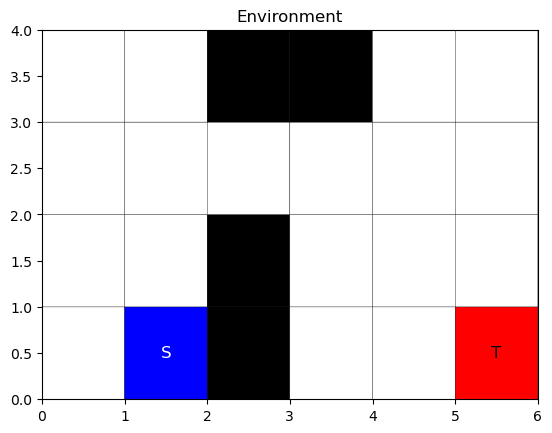

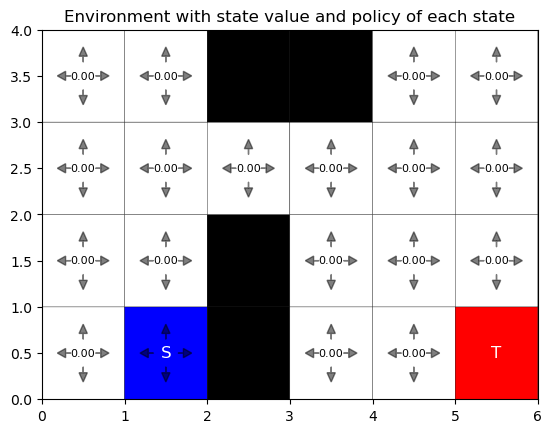

In [1026]:
# Example usage:
def initialize():
    width = 6
    height = 4
    start = 1
    terminal = 5
    num_blocks = 4  # Number of random blocks
    gamma = .9
    step_size = 0.1
    Env = Environment(width, height, start, terminal, num_blocks, gamma, step_size)
    Env.generate_blocks()
    Env.plot_grid()
    Env.plot_policy()

    return Env
Env = initialize()

### Step Function Description

The `step` function in the `Environment` class represents a single time step in the environment simulation. It takes the current state and the action to be taken as input and returns the new state and the reward obtained from the action.

- Parameters:
`state`: The current state of the agent, `action`: The action to be taken by the agent.

- Returns:
`new_state`: The new state of the agent,`reward`: The reward obtained.

- Action Encoding:
Action `0`: Move Up, Action `1`: Move Right, Action `2`: Move Down, Action `3`: Move Left.

- Behavior:
    - If the action moves the agent out of bounds,return to starting position, reward `-100`.
    - If the action moves the agent to a blocked cell, remains in the same state, reward `-1`.
    - If the action moves the agent to the terminal state, the episode terminates, reward `0`.

- Note:
The function updates the `Terminal` attribute of the environment to indicate whether the episode has terminated or not.


In [1020]:
def step(self, state, action):
    '''
    Perform a single time step in the environment simulation'''
    x, y = self.StateToLoc(state)
    if   action == 0:  # Up
        y += 1
    elif action == 1:  # Right
        x += 1
    elif action == 2:  # Down
        y -= 1
    elif action == 3:  # Left
        x -= 1

    new_state = self.LocToState((x, y))
    inbound = (0 <= x < self.width and 0 <= y < self.height)
    reward = 0
    
    if new_state in self.blocked:
        new_state = state
        reward = -1
    if not inbound:
        new_state = state
        self.Terminal = True
        reward = -100  # Large penalty for moving out of bounds

    elif self.LocToState((x, y)) == self.terminal_state:
        self.Terminal = True
        reward = 100  # Reward for reaching the terminal state
    return new_state, reward

def get_random_state(self):
    while True:
        # Generate a random state within the valid range
        state = np.random.randint(0, height * width-1)
        if state not in self.blocked and state != self.terminal_state:
            return state

Environment.get_random_state = get_random_state
Environment.step = step

## Transitioning to the Model Component
Having laid the groundwork for our environment, including its dimensions, initial and terminal states, as well as any obstacles present, we now pivot to the model component of our reinforcement learning architecture.

In the domain of model-based reinforcement learning, a crucial function emerges: the update_model function. This function assumes significance as it orchestrates the maintenance of an accurate representation of the environment within our agent's memory. It facilitates the recording of state-action transitions and associated rewards, thereby empowering the agent to construct an internal model of the environment dynamics.

As we embark on the modeling phase of our framework, the update_model function stands as a cornerstone, furnishing the mechanism through which our agent assimilates knowledge from its interactions with the environment.

In [1021]:
def update_model(self, past_state, past_action, state, reward):
    '''Update the model of the environment based on the observed transition'''
    if past_state not in self.model:
        self.model[past_state] = {}
    self.model[past_state][past_action] = (state, reward)
    
def random_policy(self):
    for i in range(self.width*self.height):
        vector = np.zeros(4)
        vector[np.random.randint(0, 4 - 1)] = 1
        self.policy[i] = vector

Environment.random_policy = random_policy
Environment.update_model = update_model

## Understanding the Monte Carlo Algorithm

The Monte Carlo method is a powerful technique used in reinforcement learning for estimating value functions and improving policies through interaction with the environment. It operates by generating episodes of experience, where an episode consists of a sequence of states, actions, and rewards. These episodes are then used to evaluate and improve the agent's policy.

1. **Initialize:**
   - Initialize V(s) and Q(s, a) arbitrarily
   - Initialize empty lists returns(s, a) and policy

2. **Repeat for each episode:**
   a. **Generate episode:**
      - Start from random state and action
      - Loop until terminal state:
         - Select action a using current policy
         - Take action a, observe reward r and next state s'
         - Append (s, a, r) to episode
         - Update state to s'
   b. **Update Q-values:**
      - For each (s, a) in episode:
         - Calculate return G from this time step until end of episode
         - Append G to returns(s, a)
         - Update Q(s, a) as the average of returns(s, a)
   c. **Policy Improvement:**
      - For each state s in episode:
         - Update V(s) as maximum over all actions Q(s, a)
         - Update policy to select action with highest Q-value for each state

3. **Until convergence or maximum iterations reached**


### Key Components of the Monte Carlo Algorithm:

1. **Episode Generation (`Generate_Episodes`):**
   - This function generates an episode by interacting with the environment from a given state and action.
   - It repeatedly takes actions in the environment until a terminal state is reached or a maximum episode length is reached.
   - At each step, it records the state, action, and reward encountered.

2. **Policy Improvement (`policy_improvement`):**
   - This function updates the agent's policy based on the observed episodes.
   - It evaluates the value of each state-action pair and updates the policy to favor actions with higher expected returns.

3. **Monte Carlo Control (`Monte_Carlo`):**
   - The main Monte Carlo algorithm iteratively performs policy evaluation and improvement.
   - It generates multiple episodes of experience and updates the value function and policy based on the observed returns.
   - In each iteration, it evaluates the returns

In [1022]:
def Generate_Episodes(self, state, action):
    States = [state]
    Action = [action]
    Reward = []
    i = 0
    self.Terminal = False
    while not self.Terminal and i < 1000:
        i+=1
        new_state, reward = self.step(States[-1], Action[-1])
        Action.append(np.random.choice(len(self.policy[new_state]), p=self.policy[new_state]))
        States.append(new_state)
        Reward.append(reward)
    return States, Action, Reward

def policy_improvment(self,States):
    for i in States:
        new_policy = np.zeros(4)
        new_policy[np.argmax(self.q_val[i])] = 1
        self.values[i] = np.max(self.q_val[i])
        self.policy[i] = new_policy



def Monte_Carlo(self,num_episodes):
    '''Performs Monte Carlo learning for policy evaluation and improvement'''
    
    self.visits = np.zeros((height * width,4))
    self.returns = np.zeros((height * width,4))
    
    for _ in range(num_episodes):
        state = self.get_random_state()      # Randome state S_0 
        action = np.random.randint(0, 4 - 1) # Randome action a_0
        States, Actions, Rewards = self.Generate_Episodes(state, action) 

        G = 0 
        
        for i in range(len(States)-2,-1,-1): #policy evaluation
            G = self.gamma * G +  Rewards[i]
            self.returns[States[i],Actions[i]] += G
            self.visits[States[i],Actions[i]] += 1
            self.q_val[States[i],Actions[i]]  = self.returns[States[i],Actions[i]] / (self.visits[States[i],Actions[i]]+0.01)
        
        self.policy_improvment(States) #policy improvment

    

Environment.Generate_Episodes = Generate_Episodes
Environment.policy_improvment = policy_improvment
Environment.Monte_Carlo = Monte_Carlo

### Policy Learning via Monte Carlo
- Random Policy Initialization
- Plot untrain policy 
- Monte Carlo Simulation:
- Plot train policy

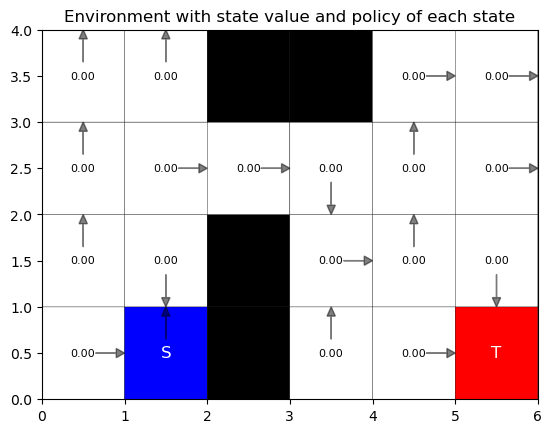

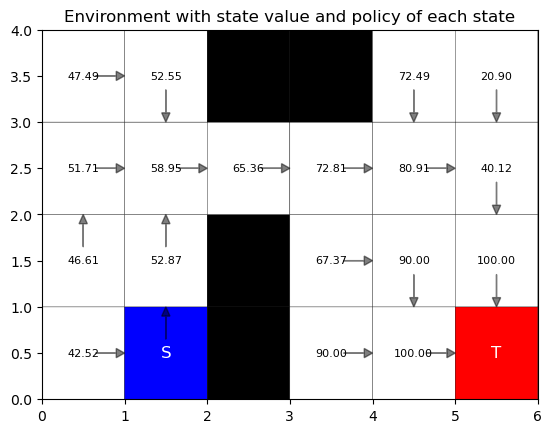

In [1027]:
Env.random_policy()
Env.plot_policy()
Env.Monte_Carlo(num_episodes=5000)
Env.plot_policy()